# Clustering Crypto

In [254]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Fetching Cryptocurrency Data

In [255]:
# Use the following endpoint to fetch json data
#url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [256]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.

In [257]:
# Alternatively, use the provided csv file:
from pathlib import Path
file_path = Path("Resources/crypto_data.csv")

# Create a DataFrame
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


### Data Preprocessing

In [258]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
crypto_df_clean = crypto_df[['CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply']]
crypto_df_clean

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [259]:
# Keep only cryptocurrencies that are trading
crypto_trading = crypto_df_clean[crypto_df_clean.IsTrading == True]
crypto_trading

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [260]:
# Keep only cryptocurrencies with a working algorithm
crypto_trading = crypto_trading.loc[crypto_trading['Algorithm'] != 'N/A']

In [261]:
# Remove the 'IsTrading' column
crypto_trading = crypto_trading.drop(columns = 'IsTrading')

In [262]:
# get all columns that has null 
crypto_trading.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [263]:
# Remove rows with at least 1 null value
crypto_trading = crypto_trading.dropna()
crypto_trading.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [264]:
# Remove rows with cryptocurrencies having no coins mined
crypto_trading = crypto_trading.loc[crypto_trading['TotalCoinsMined'] != 0]
crypto_trading

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [265]:
# Drop rows where there are 'N/A' text values
crypto_trading = crypto_trading.dropna()

In [266]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df 
coinname = pd.DataFrame(crypto_trading["CoinName"])
coinname.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [267]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_trading = crypto_trading.drop(columns = ['CoinName'])
crypto_trading

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [268]:
# Create dummy variables for text features
dummies_algo = pd.get_dummies(crypto_trading['Algorithm'])
dummies_proof = pd.get_dummies(crypto_trading['ProofType'])

crypto_dummy = crypto_trading.drop(columns=['Algorithm','ProofType'])
X = pd.concat([crypto_dummy, dummies_proof,dummies_algo], axis=1,sort=True)
X.head()

,TotalCoinsMined,TotalCoinSupply,DPOS,DPoC,DPoS,HPoW,LPoS,POBh,PoA,PoC,...,Tribus,VBFT,VeChainThor Authority,X11,X11GOST,X13,X14,X15,X16R,XEVAN
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1CR,8.821300e+04,92000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8BIT,1.467841e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
# Standardize data
X_standard = StandardScaler().fit_transform(X)
X_standard

array([[ 0.52587231,  4.4937636 , -0.0433555 , ..., -0.08695652,
        -0.08695652, -0.10670145],
       [-0.11674595,  1.20787762, -0.0433555 , ..., -0.08695652,
        -0.08695652, -0.10670145],
       [-0.09358885, -0.14499604, -0.0433555 , ..., -0.08695652,
        -0.08695652, -0.10670145],
       ...,
       [-0.11508831, -0.14916701, -0.0433555 , ..., -0.08695652,
        -0.08695652, -0.10670145],
       [-0.11634084, -0.15255408, -0.0433555 , ..., -0.08695652,
        -0.08695652, -0.10670145],
       [-0.11661084, -0.15272068, -0.0433555 , ..., -0.08695652,
        -0.08695652, -0.10670145]])

### Reducing Dimensions Using PCA

In [270]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)
pc = pca.fit_transform(crypto_standard)
crypto_pca

array([[ 2.30226943,  1.75513503, -0.84115088],
       [ 0.49075869, -1.20050359,  0.03386372],
       [-0.31470568,  1.01462125, -0.66696755],
       ...,
       [-0.15899371, -1.16323486,  0.04106011],
       [-0.14550956, -2.17300024,  0.46956598],
       [-0.15510677, -1.27084592,  0.20032631]])

In [271]:
# Create a DataFrame with the principal components data
pcs_df = pd.DataFrame(data = crypto_pca, columns=['PC 1','PC 2','PC 3'])

# re-index the datafram to match the original index
pcs_df.index = crypto_trading.index

pcs_df.head()


,PC 1,PC 2,PC 3
42,2.302269,1.755135,-0.841151
404,0.490759,-1.200504,0.033864
1337,-0.314706,1.014621,-0.666968
BTC,-0.331393,1.014314,-0.666517
ETH,-0.331375,1.014315,-0.666518


### Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [272]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

C:\Users\vince\anaconda3\envs\alpacaenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [273]:
# Initialize the K-Means model
k_model = KMeans(n_clusters = 4, random_state = 0)
# Fit the model
k_model.fit(pcs_df)
# Predict clusters
predictions = k_model.predict(pcs_df)
# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = pd.DataFrame({
    "Algorithm":crypto_trading.Algorithm,
    "ProofType": crypto_trading.ProofType,
    "TotalCoinsMined": crypto_trading.TotalCoinsMined,
    "TotalCoinSupply": crypto_trading.TotalCoinSupply,
    "PC 1": pcs_df['PC 1'],
    "PC 2": pcs_df['PC 2'],
    "PC 3": pcs_df['PC 3'],
    "CoinName": coinname.CoinName,
    "Class": k_model.labels_},
    index=crypto_trading.index)

clustered_df.head()


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,2.302269,1.755135,-0.841151,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,0.490759,-1.200504,0.033864,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,-0.314706,1.014621,-0.666968,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.331393,1.014314,-0.666517,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.331375,1.014315,-0.666518,Ethereum,0


### Visualizing Results

#### 3D-Scatter with Clusters

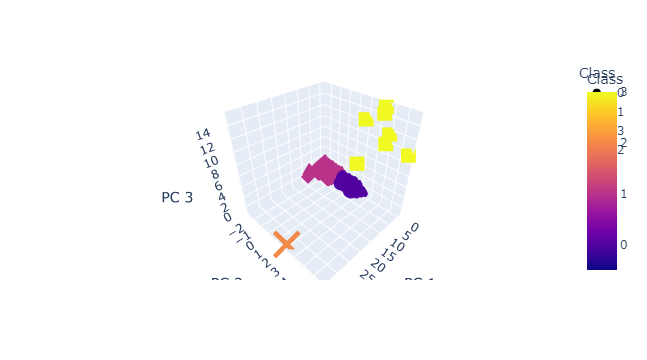

In [274]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    hover_name='CoinName',
    hover_data= ['Algorithm'],
    color="Class",
    symbol="Class")

fig.show()


#### Table of Tradable Cryptocurrencies

In [275]:
# Create columns
columns = ['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class']
# Table with tradable cryptos
clustered_df.hvplot.table(columns)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [276]:
# Print the total number of tradable cryptocurrencies
crypto_len = len(clustered_df.groupby(['CoinName']).sum())

print (f'the total number of tradable cryptocurrencies is {crypto_len}')

the total number of tradable cryptocurrencies is 532


#### Scatter Plot with Tradable Cryptocurrencies

In [277]:
# Scale data to create the scatter plot

clustered_df['TotalCoinsMined'] = clustered_df['TotalCoinsMined'].astype(float)/1000000
clustered_df['TotalCoinSupply'] = clustered_df['TotalCoinSupply'].astype(float)/1000000

In [278]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"

clustered_df.hvplot(
    kind="scatter", 
    x="TotalCoinsMined", 
    y="TotalCoinSupply", 
    c='Class', 
    colormap="viridis", 
    hover_cols=['CoinName'],
    yformatter='%.0f',
    xformatter='%.0f'
)

:Scatter   [TotalCoinsMined]   (TotalCoinSupply,Class,CoinName)